In [1]:
import pandas as pd
file_path = '/mnt/data/Advertising.csv'
data = pd.read_csv('C:\\Users\\Abhishek\\Desktop\\Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data_cleaned = data.drop(columns=['Unnamed: 0'])
X = data_cleaned[['TV', 'Radio', 'Newspaper']]
y = data_cleaned['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
model_coefficients = model.coef_
model_intercept = model.intercept_
model_coefficients, model_intercept, mse

(array([0.04472952, 0.18919505, 0.00276111]),
 2.979067338122629,
 3.1740973539761033)

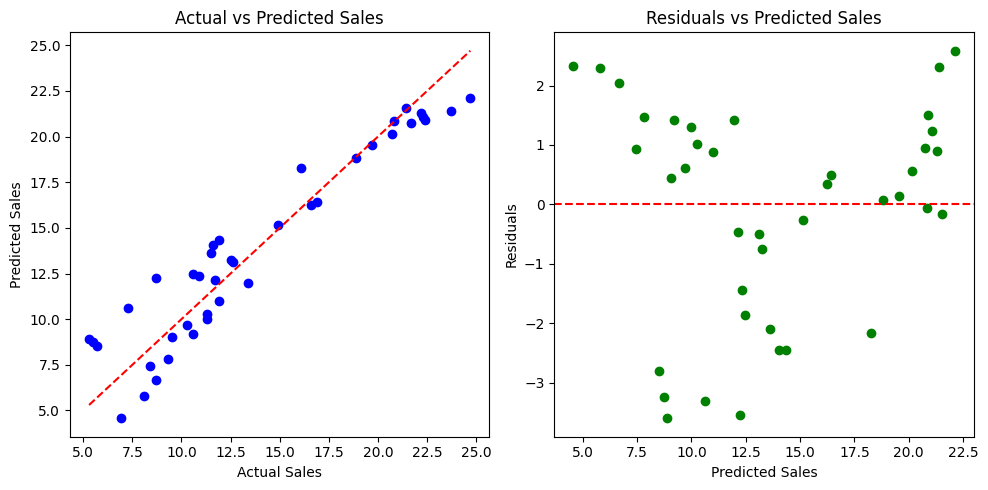

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
residuals = y_test - y_pred
plt.subplot(1,2,2)
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()